In [161]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
import math
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [162]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures"

In [163]:
import git
git = git.Git("../../../sonarqube/") 

### Import tags

In [164]:
alltags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags.actual_release_date = pd.to_datetime(alltags.actual_release_date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
alltags.rename(columns={"Date":"release_date"}, inplace=True)
tags = alltags.tail(-1)
tags

,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
1,NaT,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaT,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2
6,2016-01-28,5.3,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,2016-01-08 10:09:15,1,2016,5,5.3
7,2016-04-01,5.4,7b02df9be3cd9448699b5857586e1c6e2b28c007,2016-03-08 15:48:19,3,2016,5,5.4
8,2016-05-19,5.5,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,2016-05-02 14:09:29,5,2016,5,5.5
9,2016-06-08,5.6,074f3d1169f9688d15af4aff67e7e672cbeed782,2016-06-01 11:59:09,6,2016,5,5.6
10,NaT,5.6.1,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,2016-07-25 08:13:12,7,2016,5,5.6.1


### Filter the ones after the project started using TravisCI

In [165]:
tags = tags[tags.release_date > "2015-03-10"]

In [166]:
tags.Tag.nunique()

56

In [167]:
tags.jira_version.unique()

array(['4.5.7', '5.1', '5.1.1', '5.1.2', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.6.1', '5.6.2', '5.6.3', '5.6.4', '5.6.5', '5.6.6',
       '5.6.7', '6.0', '6.1', '6.1.1', '6.2', '6.3', '6.3.1', '6.3.2',
       '6.4', '6.5', '6.6', '6.7', '6.7.1', '6.7.2', '6.7.3', '6.7.4',
       '6.7.5', '6.7.6', '6.7.7', '7.0', '7.1', '7.2', '7.3', '7.4',
       '7.5', '7.6', '7.7', '7.8', '7.9', '7.9.1', '7.9.2', '7.9.3',
       '7.9.4', '8.0', '8.1', '8.2', '8.3', '8.3.1', '8.4', '8.4.1',
       '8.4.2'], dtype=object)

### Import tag comparison pairs

In [168]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated_no_rc_and_milestones.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison[["from_tag", "to_tag"]]

,from_tag,to_tag
0,4.5.6,4.5.7
1,5.1,5.1.1
2,5.1.1,5.1.2
3,5.1.2,5.2
4,5.2,5.3
5,5.3,5.4
6,5.4,5.5
7,5.5,5.6
8,5.6,5.6.1
9,5.6.1,5.6.2


### Import issues

In [169]:
issues = pd.read_csv(f"{csv_folder}/issues_community_final.csv", index_col=0)
for date_field in ["created", "resolutiondate"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
#issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.resolutiondate = issues.resolutiondate.dt.tz_localize(None)
issues

,issue_id,issuetype_name,resolution_name,resolutiondate,created,priority_name,versions,status
7,99571,Bug,NaN,NaT,2020-11-18 09:21:58+00:00,Major,[],Open
8,99569,Bug,Canceled,2020-11-18 14:56:05,2020-11-18 09:11:03+00:00,Major,[],Closed
13,99553,Bug,NaN,NaT,2020-11-18 00:57:21+00:00,Major,[],Open
15,99500,Bug,NaN,NaT,2020-11-16 14:22:07+00:00,Minor,"[<JIRA Version: name='8.5', id='16342'>]",Open
29,99415,Bug,Fixed,2020-11-13 07:26:40,2020-11-12 15:30:05+00:00,Major,[],Closed
...,...,...,...,...,...,...,...,...
10948,31114,Bug,Fixed,2011-07-25 14:31:54,2009-05-11 14:38:02+00:00,Major,[],Closed
11042,31093,Bug,Cannot Reproduce,2011-06-02 05:03:23,2009-03-30 15:37:16+00:00,Minor,"[<JIRA Version: name='1.7', id='11548'>]",Closed
11197,30151,Bug,Fixed,2011-06-21 05:21:32,2008-12-19 10:26:17+00:00,Trivial,"[<JIRA Version: name='1.5', id='11545'>]",Closed
11233,29088,Bug,Fixed,2008-12-17 03:36:05,2008-12-09 01:27:11+00:00,Critical,"[<JIRA Version: name='1.5', id='11545'>]",Closed


In [170]:
issues.shape

(1736, 8)

### Import issue versions

In [171]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions

,issue_id,version_name,version_id
0,99500,8.5,16342
1,99361,8.5,16342
2,99004,8.5.1,16458
3,98951,8.4,15833
4,98652,8.1,15243
...,...,...,...
3346,29492,1.0.2,11536
3347,29496,1.0.2,11536
3348,29480,1.1,11537
3349,29473,1.5,11545


### How many issues before and after the release?

In [172]:
focus_columns = ["issue_id","version_name","Tag","version_id","issuetype_name","created", "actual_release_date", "release_date"]

In [173]:
v_merged = versions.merge(issues, on="issue_id")

In [174]:
vm_merged = v_merged.merge(tags, left_on="version_name", right_on="jira_version")

In [175]:
vm_merged.created = vm_merged.created.dt.tz_localize(None)
vm_merged

,issue_id,version_name,version_id,issuetype_name,resolution_name,resolutiondate,created,priority_name,versions,status,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
0,98951,8.4,15833,Bug,NaN,NaT,2020-10-30 08:18:08,Major,"[<JIRA Version: name='8.4', id='15833'>]",Open,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
1,98350,8.4,15833,Bug,Fixed,2020-10-15 11:21:04,2020-10-13 10:46:02,Critical,"[<JIRA Version: name='8.4', id='15833'>, <JIRA...",Closed,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
2,98234,8.4,15833,Bug,Fixed,2020-10-16 11:28:13,2020-10-09 08:29:10,Minor,"[<JIRA Version: name='8.4', id='15833'>]",Closed,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
3,97521,8.4,15833,Bug,NaN,NaT,2020-09-16 07:51:26,Major,"[<JIRA Version: name='8.4', id='15833'>]",Open,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
4,96398,8.4,15833,Bug,Fixed,2020-07-31 10:44:35,2020-07-29 14:59:04,Major,"[<JIRA Version: name='8.4', id='15833'>]",Closed,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,40460,5.1.1,11628,Bug,Fixed,2015-07-15 10:34:41,2015-07-15 10:11:04,Major,"[<JIRA Version: name='5.0', id='11625'>, <JIRA...",Closed,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
656,40452,5.1.1,11628,Bug,Fixed,2015-07-22 07:54:57,2015-07-15 06:29:57,Major,"[<JIRA Version: name='5.1', id='11627'>, <JIRA...",Closed,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
657,40418,5.1.1,11628,Bug,Fixed,2015-09-16 06:37:19,2015-07-10 11:09:15,Major,"[<JIRA Version: name='5.1.1', id='11628'>]",Closed,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
658,40032,5.1.1,11628,Bug,Fixed,2015-07-13 12:13:27,2015-06-30 05:58:18,Major,"[<JIRA Version: name='5.1.1', id='11628'>]",Closed,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1


**How many issues opened after release date?**

In [176]:
(vm_merged.created > vm_merged.release_date).value_counts(normalize=True)

True     0.863636
False    0.136364
dtype: float64

<AxesSubplot:ylabel='count'>

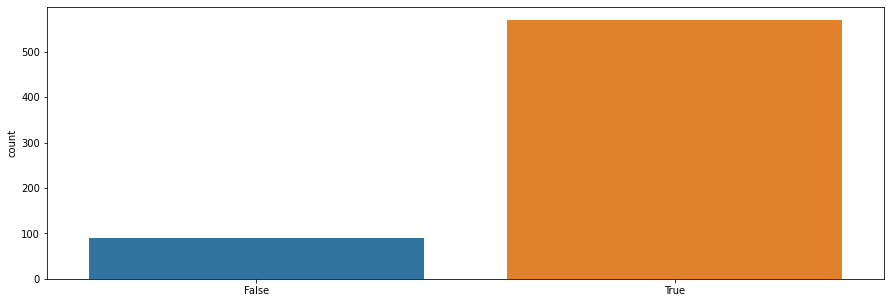

In [177]:
sns.countplot(x=vm_merged.created > vm_merged.release_date)

**Post release issues**

In [178]:
post_release = vm_merged[vm_merged.created > vm_merged.release_date]

In [179]:
post_release["diff_release_created_dates"] = post_release.created - post_release.release_date
post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-179-527cbe80a733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_dates"] = post_release.created - post_release.release_date
<ipython-input-179-527cbe80a733>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")


In [180]:
post_release.diff_release_created_days.describe()

count     570.000000
mean       90.649813
std       135.759062
min         0.011088
25%        18.506354
50%        45.113166
75%       100.294447
max      1085.021597
Name: diff_release_created_days, dtype: float64

<AxesSubplot:xlabel='diff_release_created_days'>

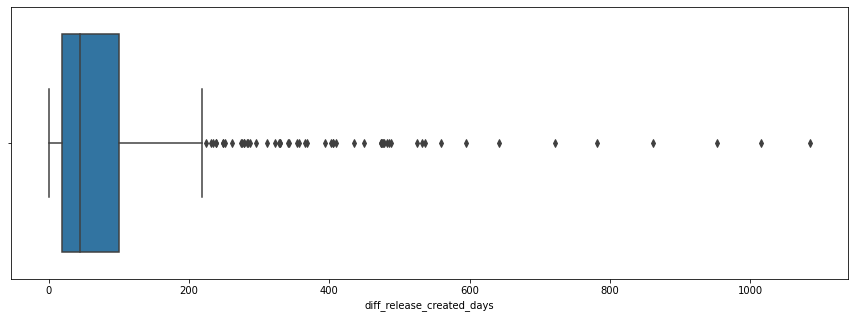

In [181]:
sns.boxplot(x=post_release.diff_release_created_days)

**Investigate outliers**

In [182]:
post_release[post_release.diff_release_created_days > 600][focus_columns]

,issue_id,version_name,Tag,version_id,issuetype_name,created,actual_release_date,release_date
121,86937,6.0,6.0,13026,Bug,2019-07-24 09:50:48,2016-08-16,2016-08-03 09:19:42
147,86937,6.1,6.1,13287,Bug,2019-07-24 09:50:48,2016-10-25,2016-10-11 07:02:29
160,86937,6.2,6.2,13327,Bug,2019-07-24 09:50:48,2017-01-05,2016-12-13 15:05:23
189,86937,6.3,6.3,13470,Bug,2019-07-24 09:50:48,2017-04-12,2017-03-14 09:12:39
211,86937,6.4,6.4,13697,Bug,2019-07-24 09:50:48,2017-06-29,2017-06-02 08:32:25
239,86937,6.5,6.5,13805,Bug,2019-07-24 09:50:48,2017-08-10,2017-08-01 11:58:54
258,86937,6.6,6.6,13961,Bug,2019-07-24 09:50:48,2017-10-20,2017-10-20 12:09:25


**Pre release issues**

In [183]:
pre_release = vm_merged[vm_merged.created < vm_merged.release_date]

In [184]:
pre_release["diff_release_created_dates"] = pre_release.release_date - pre_release.created
pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-184-96d2cd9173a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_dates"] = pre_release.release_date - pre_release.created
<ipython-input-184-96d2cd9173a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")


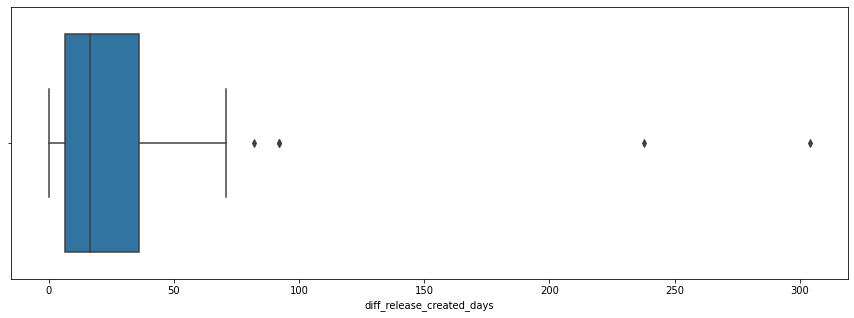

In [185]:
plt.figure()
sns_plot = sns.boxplot(x=pre_release.diff_release_created_days)
plt.savefig("output.png", transparent=True, bbox_inches='tight', pad_inches=0.2)

In [186]:
pre_release[pre_release.diff_release_created_days>200][focus_columns]

,issue_id,version_name,Tag,version_id,issuetype_name,created,actual_release_date,release_date
11,90155,8.4,8.4.0.35506,15833,Bug,2019-11-08 08:39:33,2020-07-07,2020-07-03 07:09:27
469,61798,6.7.3,6.7.3,14264,Bug,2017-06-06 14:45:35,NaT,2018-04-06 14:12:21


### Software quality metrics merging

In [187]:
pre_bug_per_version = pre_release.groupby("version_name").issue_id.count().reset_index()

In [188]:
post_bug_per_version = post_release.groupby("version_name").issue_id.count().reset_index()

In [189]:
sw_quality_metrics = tags[["jira_version"]].rename(columns={"jira_version":"version_name"})
sw_quality_metrics = sw_quality_metrics.merge(post_bug_per_version, how="outer", on="version_name")
sw_quality_metrics = sw_quality_metrics.merge(pre_bug_per_version, how="outer", on="version_name")
sw_quality_metrics.rename(columns={"issue_id_x":"post_release_bugs",
                                     "issue_id_y":"pre_release_bugs"}, inplace=True)
sw_quality_metrics = sw_quality_metrics.fillna(0)
sw_quality_metrics["dde"] = sw_quality_metrics.pre_release_bugs / (sw_quality_metrics.post_release_bugs + sw_quality_metrics.pre_release_bugs)
sw_quality_metrics.dde.fillna(1, inplace=True)
sw_quality_metrics

,version_name,post_release_bugs,pre_release_bugs,dde
0,4.5.7,1.0,0.0,0.000000
1,5.1,17.0,7.0,0.291667
2,5.1.1,6.0,0.0,0.000000
3,5.1.2,3.0,0.0,0.000000
4,5.2,36.0,2.0,0.052632
5,5.3,12.0,3.0,0.200000
6,5.4,15.0,11.0,0.423077
7,5.5,6.0,2.0,0.250000
8,5.6,34.0,1.0,0.028571
9,5.6.1,9.0,0.0,0.000000


### Priority of issues

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='priority_name', ylabel='count'>

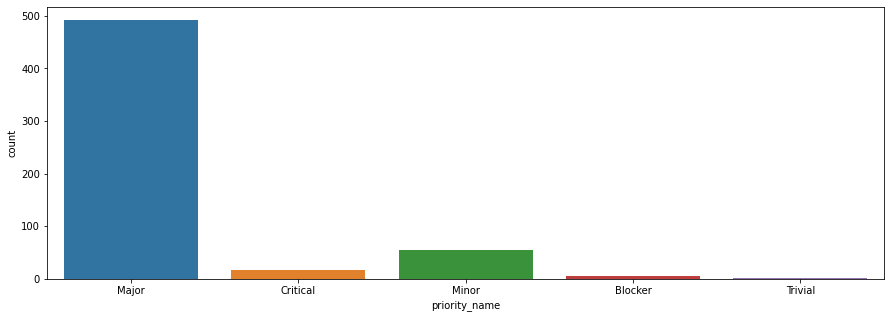

In [190]:
sns.countplot(post_release.priority_name)

In [191]:
critical_pr_per_version = post_release[post_release.priority_name.isin(["Critical", "Blocker"])].groupby("version_name").issue_id.count().reset_index()
critical_pr_per_version.rename(columns={"issue_id":"critical_post_release_bugs"}, inplace=True)
minor_pr_per_version = post_release[post_release.priority_name.isin(["Minor", "Trivial"])].groupby("version_name").issue_id.count().reset_index()
minor_pr_per_version.rename(columns={"issue_id":"minor_post_release_bugs"}, inplace=True)

In [192]:
sw_quality_metrics = sw_quality_metrics.merge(critical_pr_per_version, how="outer", on="version_name")
sw_quality_metrics.critical_post_release_bugs = sw_quality_metrics.critical_post_release_bugs.fillna(0)

In [193]:
sw_quality_metrics = sw_quality_metrics.merge(minor_pr_per_version, how="outer", on="version_name")
sw_quality_metrics.minor_post_release_bugs = sw_quality_metrics.minor_post_release_bugs.fillna(0)

In [194]:
sw_quality_metrics.head()

,version_name,post_release_bugs,pre_release_bugs,dde,critical_post_release_bugs,minor_post_release_bugs
0,4.5.7,1.0,0.0,0.000000,0.0,0.0
1,5.1,17.0,7.0,0.291667,0.0,1.0
2,5.1.1,6.0,0.0,0.000000,0.0,0.0
3,5.1.2,3.0,0.0,0.000000,0.0,0.0
4,5.2,36.0,2.0,0.052632,0.0,3.0


### Mean time to fix

In [195]:
post_release["fix_time"] = ((post_release.resolutiondate - post_release.created) / np.timedelta64(1, "D"))

<ipython-input-195-6de726c8bcd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["fix_time"] = ((post_release.resolutiondate - post_release.created) / np.timedelta64(1, "D"))


In [196]:
fix_time_per_version = post_release.groupby("version_name").fix_time.mean().reset_index()

In [197]:
sw_quality_metrics = sw_quality_metrics.merge(fix_time_per_version, how="outer", on="version_name")
sw_quality_metrics.fix_time = sw_quality_metrics.fix_time.fillna(0)
sw_quality_metrics

,version_name,post_release_bugs,pre_release_bugs,dde,critical_post_release_bugs,minor_post_release_bugs,fix_time
0,4.5.7,1.0,0.0,0.000000,0.0,0.0,434.286030
1,5.1,17.0,7.0,0.291667,0.0,1.0,76.542600
2,5.1.1,6.0,0.0,0.000000,0.0,0.0,18.665239
3,5.1.2,3.0,0.0,0.000000,0.0,0.0,103.197836
4,5.2,36.0,2.0,0.052632,0.0,3.0,63.796018
5,5.3,12.0,3.0,0.200000,1.0,1.0,68.484954
6,5.4,15.0,11.0,0.423077,1.0,0.0,61.146803
7,5.5,6.0,2.0,0.250000,0.0,1.0,16.349603
8,5.6,34.0,1.0,0.028571,0.0,2.0,54.132595
9,5.6.1,9.0,0.0,0.000000,0.0,1.0,92.887575


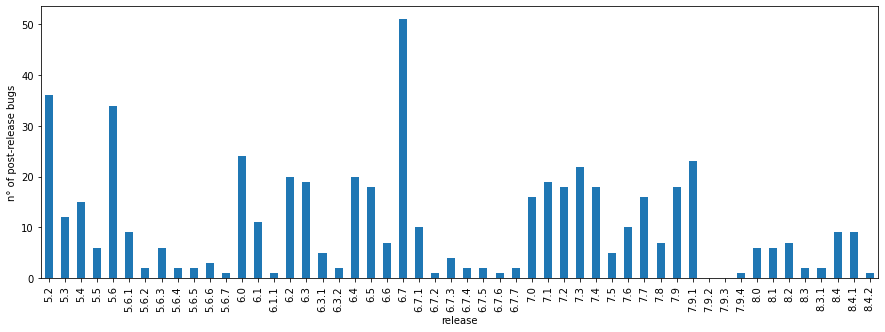

In [198]:
plt.figure()
ax = sw_quality_metrics.tail(-4).set_index("version_name").post_release_bugs.plot(kind="bar")
ax.set(xlabel="release", ylabel="n° of post-release bugs")
plt.savefig(f"{figure_folder}/sw_quality_metrics/post_release_bugs_dist.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

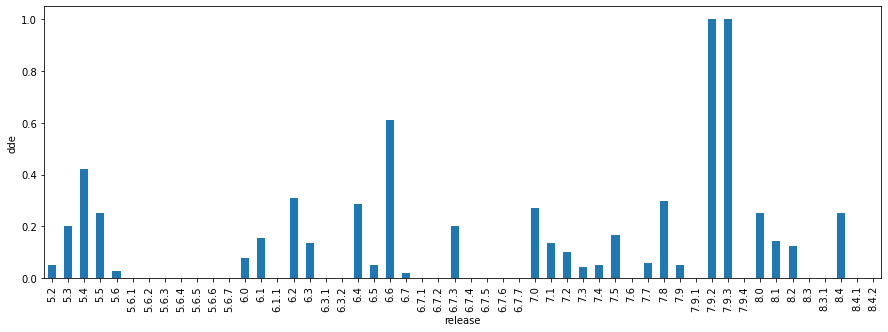

In [199]:
plt.figure()
ax = sw_quality_metrics.tail(-4).set_index("version_name").dde.plot(kind="bar")
ax.set(xlabel="release", ylabel="dde")
plt.savefig(f"{figure_folder}/sw_quality_metrics/dde.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

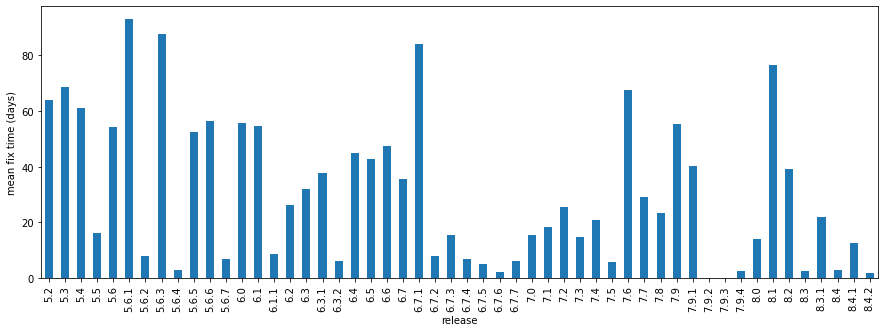

In [200]:
plt.figure()
ax = sw_quality_metrics.tail(-4).set_index("version_name").fix_time.plot(kind="bar")
ax.set(xlabel="release", ylabel="mean fix time (days)")
plt.savefig(f"{figure_folder}/sw_quality_metrics/fix_time.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

### Export to csv

In [201]:
sw_quality_metrics.to_csv(f"{csv_folder}/tags_software_quality_metrics_no_rc_and_milestones.csv")